<a href="https://colab.research.google.com/github/jiyoungemma/section1_project/blob/main/Game_industry_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 셋 불러오기 & 전처리

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')
df.shape

(16598, 10)

In [7]:
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [8]:
#결측값을 앞의 값으로 대체

df = df.fillna(method='ffill')

#method = 'bfill', fillna(0), dropna() 모두 적용한 결과 각 값들의 수치의 차이가 적고, 시각화하였을때 순위 변동이 크지 않았음 

In [9]:
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [10]:
df['Year'] = df['Year'].round(0).astype(int)

In [11]:
def tofloat(string): 
  if string[-1] == 'K':
    return (float(string.replace('K',''))) / 1000
  elif string[-1] == 'M':
    return float(string.replace('M',''))
  else:
    return float(string)

#데이터 셋 전체를 봤을 때, 몇개의 데이터에 M,K가 포함되어 있음.
#전체 단위를 million 이라 생각하여 해석(문자가 붙지 않은 값이 M을 제거한 값과 동일하기 때문) -> M이 있는 데이터는 M을 제거, K는 1000으로 보고 million 단위로 변경 

In [12]:
df['NA_Sales'] = df['NA_Sales'].apply(tofloat)
df['EU_Sales'] = df['EU_Sales'].apply(tofloat)
df['JP_Sales'] = df['JP_Sales'].apply(tofloat)
df['Other_Sales'] = df['Other_Sales'].apply(tofloat)

In [13]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [14]:
df = df.drop(['Unnamed: 0'],axis=1)

In [15]:
df['Year'] = df['Year'].astype(str)

In [16]:
def change(year):
  if len(year) == 1:
    return int('200' + year)
  else:
    return int(year)

def convert(year):
    if year > 9 and year < 21:
      return 2000+ year
    if year == 97 or year == 96 or year == 98 or year == 86 or year == 95 or year == 94:
      return 1900 + year
    else:
      return year

#연도 표시가 두자리로 되어있는 값을 4자리로 변경

In [17]:
df['Year'] = df['Year'].apply(change)

In [18]:
df['Year'] = df['Year'].apply(convert)

In [19]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


### 지역에 따라서 선호하는 게임 장르가 다를까

In [20]:
gerne_country = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby('Genre').agg(['sum']).round(3)
gerne_country.columns = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
gerne_country = gerne_country.reset_index()
gerne_country
#평균은 극단치에 영향을 많이 받고, 중앙값은 0값이 많아 비교하기에 용이하지 않다고 판단 -> 합계 데이터 사용

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,878.61,523.59,160.28,188.39
1,Adventure,107.19,64.91,52.22,17.22
2,Fighting,223.65,101.47,87.99,36.74
3,Misc,410.13,215.97,107.76,74.73
4,Platform,447.28,202.16,130.67,51.76
5,Puzzle,123.84,51.06,57.16,12.55
6,Racing,358.41,237.53,57.21,77.28
7,Role-Playing,319.59,183.62,344.95,56.97
8,Shooter,584.05,313.62,39.37,102.97
9,Simulation,183.02,113.39,63.70,31.49


In [21]:
gerne_country['rank_NA'] = gerne_country['NA_Sales'].rank(ascending=False)
gerne_country['rank_EU'] = gerne_country['EU_Sales'].rank(ascending=False)
gerne_country['rank_JP'] = gerne_country['JP_Sales'].rank(ascending=False)
gerne_country['rank_Other'] = gerne_country['Other_Sales'].rank(ascending=False)

rank = gerne_country.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
rank['rank_sum'] = rank.sum(axis=1)
gerne_country = gerne_country.drop(['rank_Other','rank_NA','rank_EU','rank_JP'],axis=1)
rank
#전체 국가 : Action - Sports - Misc - (Platform, Role Playing, Shooter) - Racing - Fighting - Simulation - (Adventure, Puzzle) - Strategy
#rank_sum 이 작을수록 출시량 순위가 높은 것

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


,Genre,rank_NA,rank_EU,rank_JP,rank_Other,rank_sum
0,Action,1.0,1.0,2.0,1.0,5.0
1,Adventure,11.0,10.0,10.0,10.0,41.0
2,Fighting,8.0,9.0,6.0,8.0,31.0
3,Misc,5.0,5.0,5.0,5.0,20.0
4,Platform,4.0,6.0,4.0,7.0,21.0
5,Puzzle,10.0,11.0,9.0,11.0,41.0
6,Racing,6.0,4.0,8.0,4.0,22.0
7,Role-Playing,7.0,7.0,1.0,6.0,21.0
8,Shooter,3.0,3.0,12.0,3.0,21.0
9,Simulation,9.0,8.0,7.0,9.0,33.0


In [22]:
data = gerne_country.pivot_table(columns='Genre').reset_index()
data

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,EU_Sales,523.59,64.91,101.47,215.97,202.16,51.06,237.53,183.62,313.62,113.39,381.49,45.32
1,JP_Sales,160.28,52.22,87.99,107.76,130.67,57.16,57.21,344.95,39.37,63.70,140.25,49.46
2,NA_Sales,878.61,107.19,223.65,410.13,447.28,123.84,358.41,319.59,584.05,183.02,688.48,68.70
3,Other_Sales,188.39,17.22,36.74,74.73,51.76,12.55,77.28,56.97,102.97,31.49,136.29,11.36


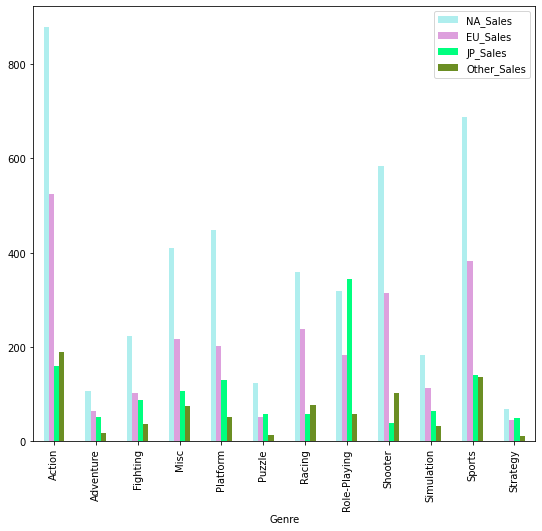

In [23]:
import matplotlib.pyplot as plt 
colors = ['paleturquoise','plum','springgreen','olivedrab']
gerne_country.plot(x="Genre", y=["NA_Sales", "EU_Sales", "JP_Sales",'Other_Sales'], kind="bar",figsize=(9,8),color=colors)
plt.show()

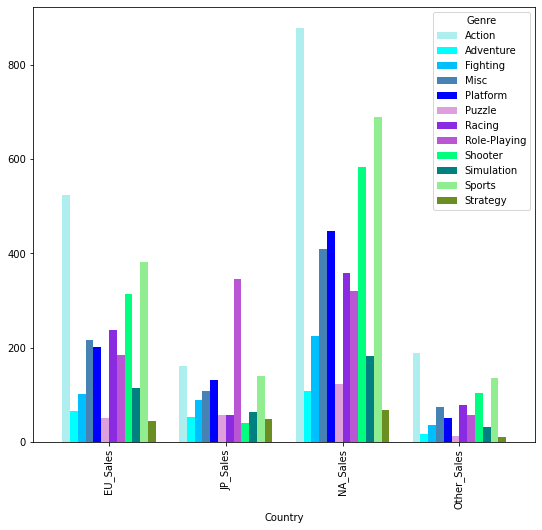

In [24]:
colors = ['paleturquoise','aqua','deepskyblue','steelblue','blue','plum','blueviolet','mediumorchid','springgreen','teal','lightgreen','olivedrab']
data.plot(x="index", y=['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy'], kind="bar",figsize=(9,8),color=colors,width = 0.8)
plt.xlabel('Country')
plt.show()

# 유럽 : Action - Sports - Shooter - Racing - Misc - Platform - Role Playing - Simulation - Fighting - Adventure - Puzzle - Strategy
# 일본 : Role Playing - Action - Sports - Platform - Misc - Fighting - Simulation - Racing - Puzzle - Adventure - Strategy - Shooter
# 미주 : Action - Sports - Shooter - Platform - Misc - Racing - Role Playing - Fighting - Simulation - Puzzle - Adventure - Strategy
# 그외 : Action - Sports - Shooter - Racing - Misc - Role Playing - Platform - Fighting - Simulation - Adventure - Puzzle - Strategy
#지역에 따라서 선호하는 게임의 장르가 다른가 -> 일본과 다른 국가간의 선호도 차이가 있으나 대체로 비슷한 기조를 보임

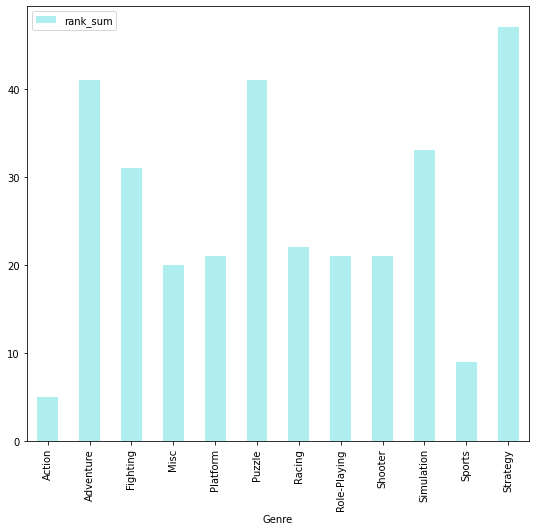

In [25]:
colors = ['paleturquoise']
rank.plot(x="Genre", y=["rank_sum"], kind="bar",figsize=(9,8),color=colors)
plt.show()

> 지역에 따라서 선호하는 게임의 장르가 다른가 -> 일본과 다른 국가간의 선호도 차이가 있으나 대체로 비슷한 기조를 보임
* 전체 국가 : Action - Sports - Misc - (Platform, Role Playing, Shooter) - Racing - Fighting - Simulation - (Adventure, Puzzle) - Strategy
* 유럽 : Action - Sports - Shooter - Racing - Misc - Platform - Role Playing - Simulation - Fighting - Adventure - Puzzle - Strategy
* 일본 : Role Playing - Action - Sports - Platform - Misc - Fighting - Simulation - Racing - Puzzle - Adventure - Strategy - Shooter
* 미주 : Acion - Sports - Shooter - Platform - Misc - Racing - Role Playing - Fighting - Simulation - Puzzle - Adventure - Strategy
* 그외 : Action - Sports - Shooter - Racing - Misc - Role Playing - Platform - Fighting - Simulation - Adventure - Puzzle - Strategy


### 연도별 게임트렌드가 있을까

In [26]:
trandy_amount = df.drop(['Name','Platform','Publisher'],axis=1).sort_values('Year').reset_index(drop=True)

In [27]:
trandy_amount['sum'] = trandy_amount.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
trandy_amount = trandy_amount.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)

In [28]:
trandy_amount.head()

,Year,Genre,sum
0,1980,Misc,0.23
1,1980,Shooter,4.31
2,1980,Misc,1.15
3,1980,Platform,0.50
4,1980,Shooter,2.76


In [29]:
trandy = trandy_amount.groupby(['Year','Genre'])['sum'].sum().reset_index()

#연도별 각 장르의 출시량 총합

In [30]:
trandy.head()

,Year,Genre,sum
0,1980,Action,0.79
1,1980,Fighting,0.77
2,1980,Misc,2.70
3,1980,Platform,0.50
4,1980,Shooter,7.07


In [31]:
max = trandy.loc[trandy.groupby(['Year'])['sum'].idxmax()].reset_index()
max = max.drop(['index'],axis=1)
max.head()

#연도별 출시량이 가장 많은 장르

,Year,Genre,sum
0,1980,Shooter,7.07
1,1981,Action,14.79
2,1982,Puzzle,10.04
3,1983,Platform,6.93
4,1984,Shooter,31.10


In [32]:
sizeoftrandy = max.groupby(['Genre'], as_index=False).size()
sizeoftrandy

#연도별 출시량이 가장 많은 장르의 누적 개수

,Genre,size
0,Action,17
1,Fighting,2
2,Platform,8
3,Puzzle,2
4,Racing,1
5,Role-Playing,3
6,Shooter,2
7,Simulation,1
8,Sports,3


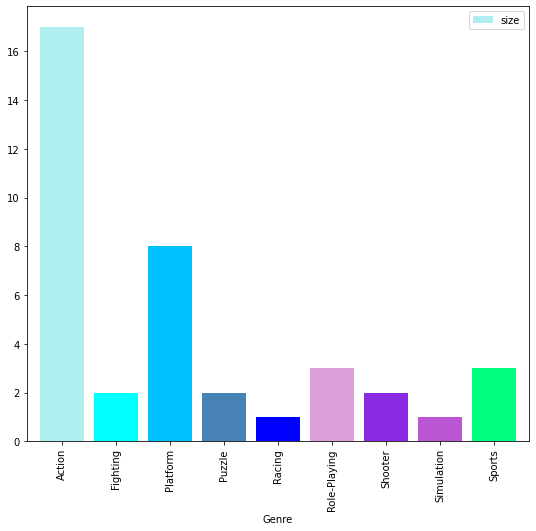

In [33]:
colors = ['paleturquoise','aqua','deepskyblue','steelblue','blue','plum','blueviolet','mediumorchid','springgreen']
sizeoftrandy.plot(x="Genre", y='size', kind="bar",figsize=(9,8),color=colors,width = 0.8)
plt.xlabel('Genre')
plt.show()

> 1980년부터 2020년까지의 게임의 장르별 출시량을 보면, Action 장르가 압도적으로 많이 출시된 것을  확인할 수 있음
* 연도별 트렌티한 게임의 장르가 있으나 2000년대 들어서부터 Action장르의 출시량이 가장 많았음

> 현재의 추세를 보았을 때, 다음 분기에 Action 장르의 게임을 출시하는 것이 가장 이상적이다. 최근 2~3년 사이의 데이터를 보면 2017년에는 Role-Playing, 2020년에는 Simulation 장르의 출시량이 높았으나 그 양은 이전년도에 비해 상당히 적다. 때문에 이를 이유로 10년이상 출시량이 가장 높았던 Action 장르가 아닌 다른 장르의 게임을 출시하는 것은 위험요소가 존재한다고 판단된다.

### 플랫폼에 따라 출시량의 차이가 있을까

In [34]:
platform = df.drop(['Name','Publisher','Year'],axis = 1).reset_index(drop=True)
platform.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,Action,0.04,0.00,0.00,0.00
1,Wii,Action,0.17,0.00,0.00,0.01
2,PSP,Adventure,0.00,0.00,0.02,0.00
3,DS,Misc,0.04,0.00,0.00,0.00
4,PS3,Platform,0.12,0.09,0.00,0.04


In [35]:
platform['sum'] = platform.loc[:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
platform = platform.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
platform.head()

,Platform,Genre,sum
0,DS,Action,0.04
1,Wii,Action,0.18
2,PSP,Adventure,0.02
3,DS,Misc,0.04
4,PS3,Platform,0.25


In [36]:
platform = platform.groupby(['Platform','Genre'])['sum'].sum().reset_index()
platform

,Platform,Genre,sum
0,2600,Action,29.25
1,2600,Adventure,1.70
2,2600,Fighting,1.24
3,2600,Misc,3.57
4,2600,Platform,13.76
...,...,...,...
288,XOne,Role-Playing,9.46
289,XOne,Shooter,51.61
290,XOne,Simulation,0.54
291,XOne,Sports,23.98


In [37]:
platform['Platform'].unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [38]:
platform_max = platform.loc[platform.groupby(['Platform'])['sum'].idxmax()].reset_index().drop(['index'],axis=1)
platform_size = platform_max.groupby(['Genre'], as_index=False).size()
platform_size

,Genre,size
0,Action,8
1,Adventure,2
2,Fighting,2
3,Misc,1
4,Platform,7
5,Racing,1
6,Role-Playing,4
7,Shooter,3
8,Simulation,1
9,Sports,2


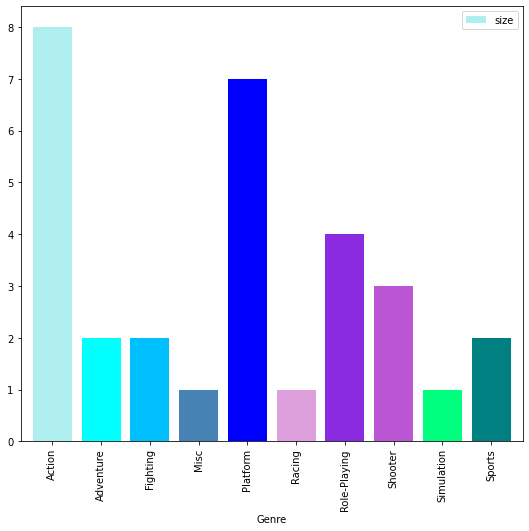

In [39]:
colors = ['paleturquoise','aqua','deepskyblue','steelblue','blue','plum','blueviolet','mediumorchid','springgreen','teal','lightgreen','olivedrab']
platform_size.plot(x="Genre", y='size', kind="bar",figsize=(9,8),color=colors,width = 0.8)
plt.xlabel('Genre')
plt.show()

### 최근 5년간의 트렌드는 무엇일까

In [40]:
recently = trandy.loc[trandy['Year'] > 2013].reset_index()
recently = recently.drop(['index'],axis=1)
recently

,Year,Genre,sum
0,2014,Action,99.13
1,2014,Adventure,6.09
2,2014,Fighting,16.15
3,2014,Misc,23.73
4,2014,Platform,8.87
5,2014,Puzzle,1.51
6,2014,Racing,16.77
7,2014,Role-Playing,45.89
8,2014,Shooter,66.02
9,2014,Simulation,5.93


In [41]:
recently.loc[recently.groupby(['Year'])['sum'].idxmax()]

,Year,Genre,sum
0,2014,Action,99.13
12,2015,Action,69.75
24,2016,Action,20.90
36,2017,Role-Playing,0.04
37,2020,Simulation,0.29


> 계속해서 Action 장르 가 트렌디했으나 2017년, 2020년에는 트렌드가 변함
* 2017년, 2020년 출시량 총합이 과거 연도에 비해 매우 적은 양이기 때문에 유의미한 값이라고 보기에 어려움이 있음
* 표면적인 트렌드는 변화하였으나, 각 연도에서 출시한 장르의 개수가 적고 출시량 역시 적어 트렌드가 변화했다 단정하기에 어려움이 있음 